# Regressão linear para predição de pressão arterial

### Introdução:

A pressão arterial elevada é um dos principais fatores de risco para doenças cardiovasculares, sendo um indicador crucial na prevenção de eventos como ataques cardíacos e acidentes vasculares cerebrais. Monitorar e prever os níveis de pressão arterial em pacientes é uma prática vital na medicina, pois permite intervenções preventivas antes que ocorram complicações graves.

Este projeto tem como objetivo desenvolver um modelo preditivo para estimar os níveis de pressão arterial de indivíduos com base em um conjunto de fatores de risco. Utilizando técnicas de aprendizado de máquina, como a regressão linear, e explorando dados clínicos recentemente encontrados, este estudo busca fornecer uma ferramenta que possa auxiliar profissionais de saúde na tomada de decisões informadas.

Ao longo deste projeto, serão abordadas as etapas de pré-processamento dos dados, construção e avaliação do modelo, e análise dos resultados obtidos. O objetivo final é avaliar a eficácia do modelo proposto e discutir seu potencial de aplicação em contextos clínicos

### Contextualização:

A hipertensão arterial, comumente conhecida como "pressão alta", é uma condição crônica que afeta milhões de pessoas em todo o mundo. Caracterizada por níveis consistentemente elevados de pressão nas artérias, a hipertensão é um fator de risco significativo para doenças cardiovasculares, que continuam a ser a principal causa de morte globalmente. De acordo com a Organização Mundial da Saúde (OMS), cerca de 1,13 bilhão de pessoas em todo o mundo sofrem de hipertensão, com menos de 1 em cada 5 pessoas mantendo uma condição sob controle

A capacidade de prever a pressão arterial com base em fatores de risco específicos, como idade, sexo, níveis de colesterol e presença de condições como diabetes, é uma ferramenta valiosa para os profissionais de saúde. Um modelo preditivo eficaz pode fornecer insights sobre quais indivíduos estão em maior risco, permitindo intervenções precoces

Neste projeto, utilizamos dados de pacientes para treinar um modelo de aprendizado de máquina capaz de prever a pressão arterial. Esse modelo pode ser utilizado em práticas clínicas para identificar pacientes em risco, ajustar tratamentos preventivos e, assim, reduzir as consequências de complicações cardiovasculares graves. Ao entender os fatores que influenciam a pressão arterial, os profissionais de saúde podem adotar abordagens mais proativas na gestão da saúde cardiovascular.

In [62]:
# Importando bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, KFold,train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
import warnings # Ignorar avisos específicos
warnings.filterwarnings("ignore", category=UserWarning)

In [63]:
# Carregando DataFrame
df = pd.read_csv(r'heart_attack_dataset.csv')

Neste estudo, utilizamos um conjunto de dados que inclui informações sobre fatores de risco associados a ataques cardíacos, como idade, colesterol, presença de diabetes, entre outros. A análise será conduzida utilizando técnicas de normalização para preparar os dados e aplicar modelos de regressão linear, com o objetivo de prever a pressão arterial de pacientes com base em suas características individuais.

> Este conjuntado de dados foi retirado do: https://www.kaggle.com/datasets/waqi786/heart-attack-dataset

#### Conjunto de dados de fatores de risco de ataque cardíaco
Este conjunto de dados fornece uma visão geral abrangente de vários fatores associados aos riscos de ataque cardíaco. Ele inclui informações detalhadas sobre o histórico médico dos pacientes, hábitos de vida e medidas fisiológicas. Os dados foram coletados de vários estudos médicos e registros hospitalares respeitáveis, garantindo uma representação diversa e precisa dos fatores de risco de ataque cardíaco em diferentes demografias.

O arquivo do conjunto de dados, Ataque_cardiacos.csv, contém dados estruturados sobre vários fatores relacionados a riscos de ataque cardíaco. Ele inclui as seguintes colunas:

<b>Idade:</b>A idade do paciente.

<b>Gender:</b>O gênero do paciente.

<b>Pressão arterial em repouso:</b> A pressão arterial em repouso do paciente em mm Hg.

<b>Colesterol:</b> O nível de colesterol.

<b>Has Diabetes:</b> se o paciente tem diábetes

<b>Smoking Status:</b> Status de fumante

<b>Tipo de dor no peito:</b> O tipo de dor no peito experimentada (variando de 0 a 3, indicando diferentes níveis de gravidade).

<b>Treatment:</b> Possivéis tratamento

# Análise Exploratória:

In [64]:
# Visualisando os dados!
df.head(100)

,Gender,Age,Blood Pressure (mmHg),Cholesterol (mg/dL),Has Diabetes,Smoking Status,Chest Pain Type,Treatment
0,Male,70,181,262,No,Never,Typical Angina,Lifestyle Changes
1,Female,55,103,253,Yes,Never,Atypical Angina,Angioplasty
2,Male,42,95,295,Yes,Current,Typical Angina,Angioplasty
3,Male,84,106,270,No,Never,Atypical Angina,Coronary Artery Bypass Graft (CABG)
4,Male,86,187,296,Yes,Current,Non-anginal Pain,Medication
...,...,...,...,...,...,...,...,...
95,Female,30,197,271,Yes,Never,Asymptomatic,Lifestyle Changes
96,Female,79,196,158,No,Current,Non-anginal Pain,Lifestyle Changes
97,Female,67,141,255,Yes,Never,Typical Angina,Coronary Artery Bypass Graft (CABG)
98,Female,51,153,161,Yes,Current,Asymptomatic,Lifestyle Changes


In [65]:
# Infomações
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Gender                 1000 non-null   object
 1   Age                    1000 non-null   int64 
 2   Blood Pressure (mmHg)  1000 non-null   int64 
 3   Cholesterol (mg/dL)    1000 non-null   int64 
 4   Has Diabetes           1000 non-null   object
 5   Smoking Status         1000 non-null   object
 6   Chest Pain Type        1000 non-null   object
 7   Treatment              1000 non-null   object
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [66]:
# Colunas e seus tipos de dados.
df.dtypes

Gender                   object
Age                       int64
Blood Pressure (mmHg)     int64
Cholesterol (mg/dL)       int64
Has Diabetes             object
Smoking Status           object
Chest Pain Type          object
Treatment                object
dtype: object

In [67]:
# Estatistíca descritiva das varáveis quantitativas.
df.describe()

,Age,Blood Pressure (mmHg),Cholesterol (mg/dL)
count,1000.000000,1000.000000,1000.000000
mean,60.338000,145.440000,223.789000
std,17.317496,31.756525,42.787817
min,30.000000,90.000000,150.000000
25%,45.000000,118.000000,185.000000
50%,60.500000,146.000000,225.500000
75%,76.000000,173.000000,259.000000
max,89.000000,199.000000,299.000000


#### Análise de Outliers

In [68]:
# Verificando Valores Outliers nas colunas Blood Pressure (mmHg), Cholesterol (mg/dL).
def calculate_outliers(df, column):
    # Calcular os percentis
    Q1 = np.percentile(df[column], 25)
    Q3 = np.percentile(df[column], 75)
    
    # Calcular o IQR
    IQR = Q3 - Q1
    
    # Definir limites de outliers
    lower_bound = Q1 - 0.5 * IQR
    upper_bound = Q3 + 0.5 * IQR
    
    # Identificar outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    return outliers, lower_bound, upper_bound

In [69]:
# coluna 'Blood Pressure (mmHg)', normalmente, a pressão arterial sistólica varia entre 90 e 140 mmHg.
outliers_bp, lower_bp, upper_bp = calculate_outliers(df, 'Blood Pressure (mmHg)')
print(f"Limite inferior para Pressão Arterial: {lower_bp}")
print(f"Limite superior para Pressão Arterial: {upper_bp}")
print(f"Outliers na Pressão Arterial:\n{outliers_bp}")

Limite inferior para Pressão Arterial: 90.5
Limite superior para Pressão Arterial: 200.5
Outliers na Pressão Arterial:
     Gender  Age  Blood Pressure (mmHg)  Cholesterol (mg/dL) Has Diabetes  \
437  Female   45                     90                  252           No   
441  Female   49                     90                  151           No   
697  Female   60                     90                  238           No   
779    Male   58                     90                  203          Yes   
992  Female   77                     90                  276          Yes   

    Smoking Status   Chest Pain Type                            Treatment  
437        Current   Atypical Angina                    Lifestyle Changes  
441        Current      Asymptomatic  Coronary Artery Bypass Graft (CABG)  
697          Never    Typical Angina  Coronary Artery Bypass Graft (CABG)  
779        Current  Non-anginal Pain                          Angioplasty  
992          Never  Non-anginal Pain  

#### Observações dos Outliers na coluna 'Blood Pressure (mmHg)':
    
Outliers Encontrados: Os registros listados possuem uma pressão arterial exatamente no limite inferior de 90 mmHg.

Pacientes Identificados: Há 5 pacientes identificados com pressão arterial de 90 mmHg, o que está no limite inferior para pressão arterial considerada normal.

Gênero: A maioria dos outliers são mulheres.

Idade: A faixa etária varia de 45 a 77 anos.

Colesterol: Níveis de colesterol variam, com alguns casos acima de 250 mg/dL, o que é elevado.

In [70]:
# Coluna 'Cholesterol (mg/dL)'
outliers_chol, lower_chol, upper_chol = calculate_outliers(df, 'Cholesterol (mg/dL)')
print(f"Limite inferior para Colesterol: {lower_chol}")
print(f"Limite superior para Colesterol: {upper_chol}")
print(f"Outliers no Colesterol:\n{outliers_chol}")

Limite inferior para Colesterol: 148.0
Limite superior para Colesterol: 296.0
Outliers no Colesterol:
     Gender  Age  Blood Pressure (mmHg)  Cholesterol (mg/dL) Has Diabetes  \
41     Male   49                    125                  297           No   
51   Female   41                    181                  297          Yes   
161    Male   88                    154                  299          Yes   
182  Female   72                    151                  298          Yes   
225  Female   86                    192                  299           No   
294  Female   32                    172                  297           No   
334  Female   53                    197                  297          Yes   
341  Female   50                    167                  299          Yes   
350  Female   80                    141                  297          Yes   
379    Male   64                    181                  299          Yes   
509  Female   83                    120            

#### Observações dos Outliers na coluna Cholesterol (mg/dL)
Os níveis de colesterol nesses outliers estão apenas um pouco acima do limite superior de 296 mg/dL. Embora tecnicamente sejam outliers, esses valores não são extremamente altos, mas indicam risco cardiovascular aumentado. Muitos desses pacientes têm outros fatores de risco, como diabetes e histórico de tabagismo, o que pode agravar o impacto do colesterol elevado.

> Decidi manter esse valores outliers mesmo que sejam pequenos por que irei futuramente aplicar algum modelo de machine learnig e quero que esses dados estejam juntos.

In [71]:
# Configurações gerais para os gráficos
sns.set(style="whitegrid")

‎ 

In [72]:
# Resumo estatístico da idade por gênero
age_gender_summary = df.groupby('Gender')['Age'].describe()
age_gender_summary

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,510.0,60.531373,17.337571,30.0,45.25,61.5,76.0,89.0
Male,490.0,60.136735,17.311996,30.0,45.00,60.0,76.0,89.0


A distribuição de idade é muito similar entre homens e mulheres, com diferenças mínimas na média e mediana.

‎ 

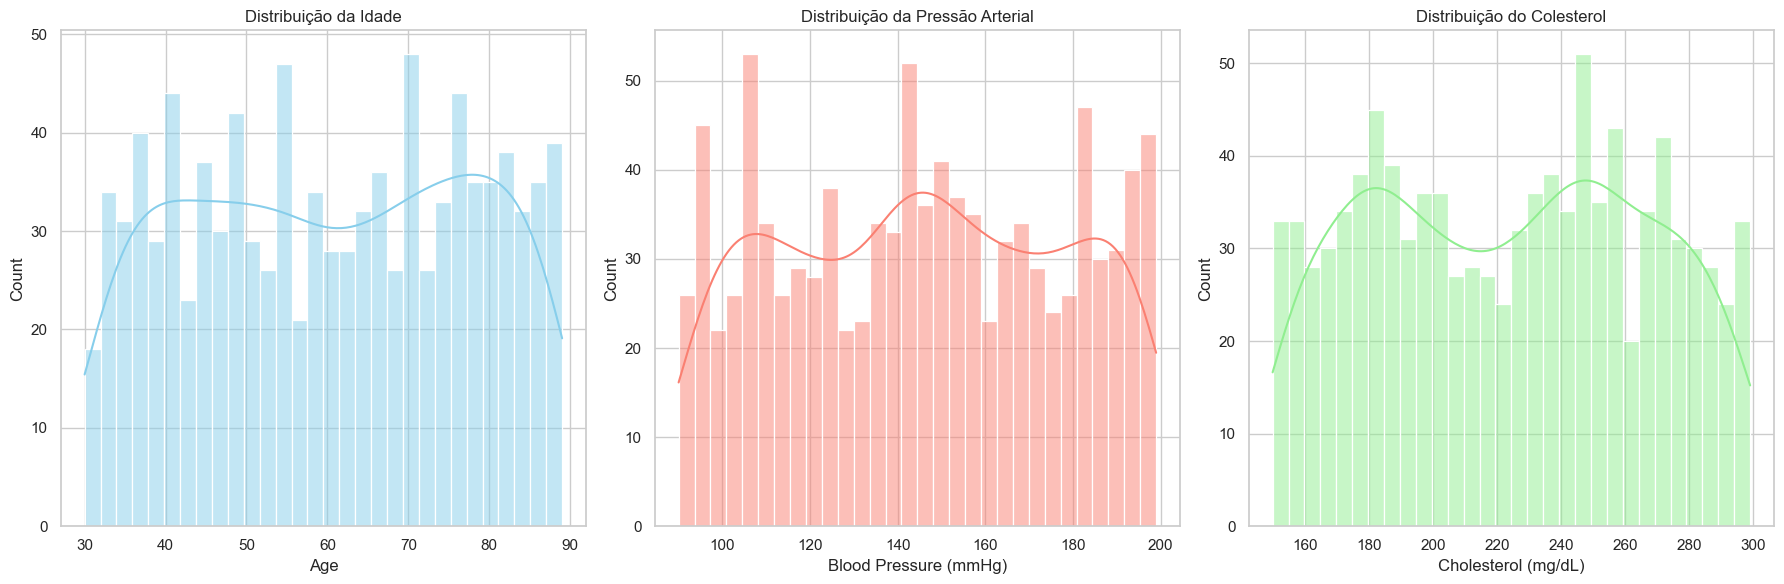

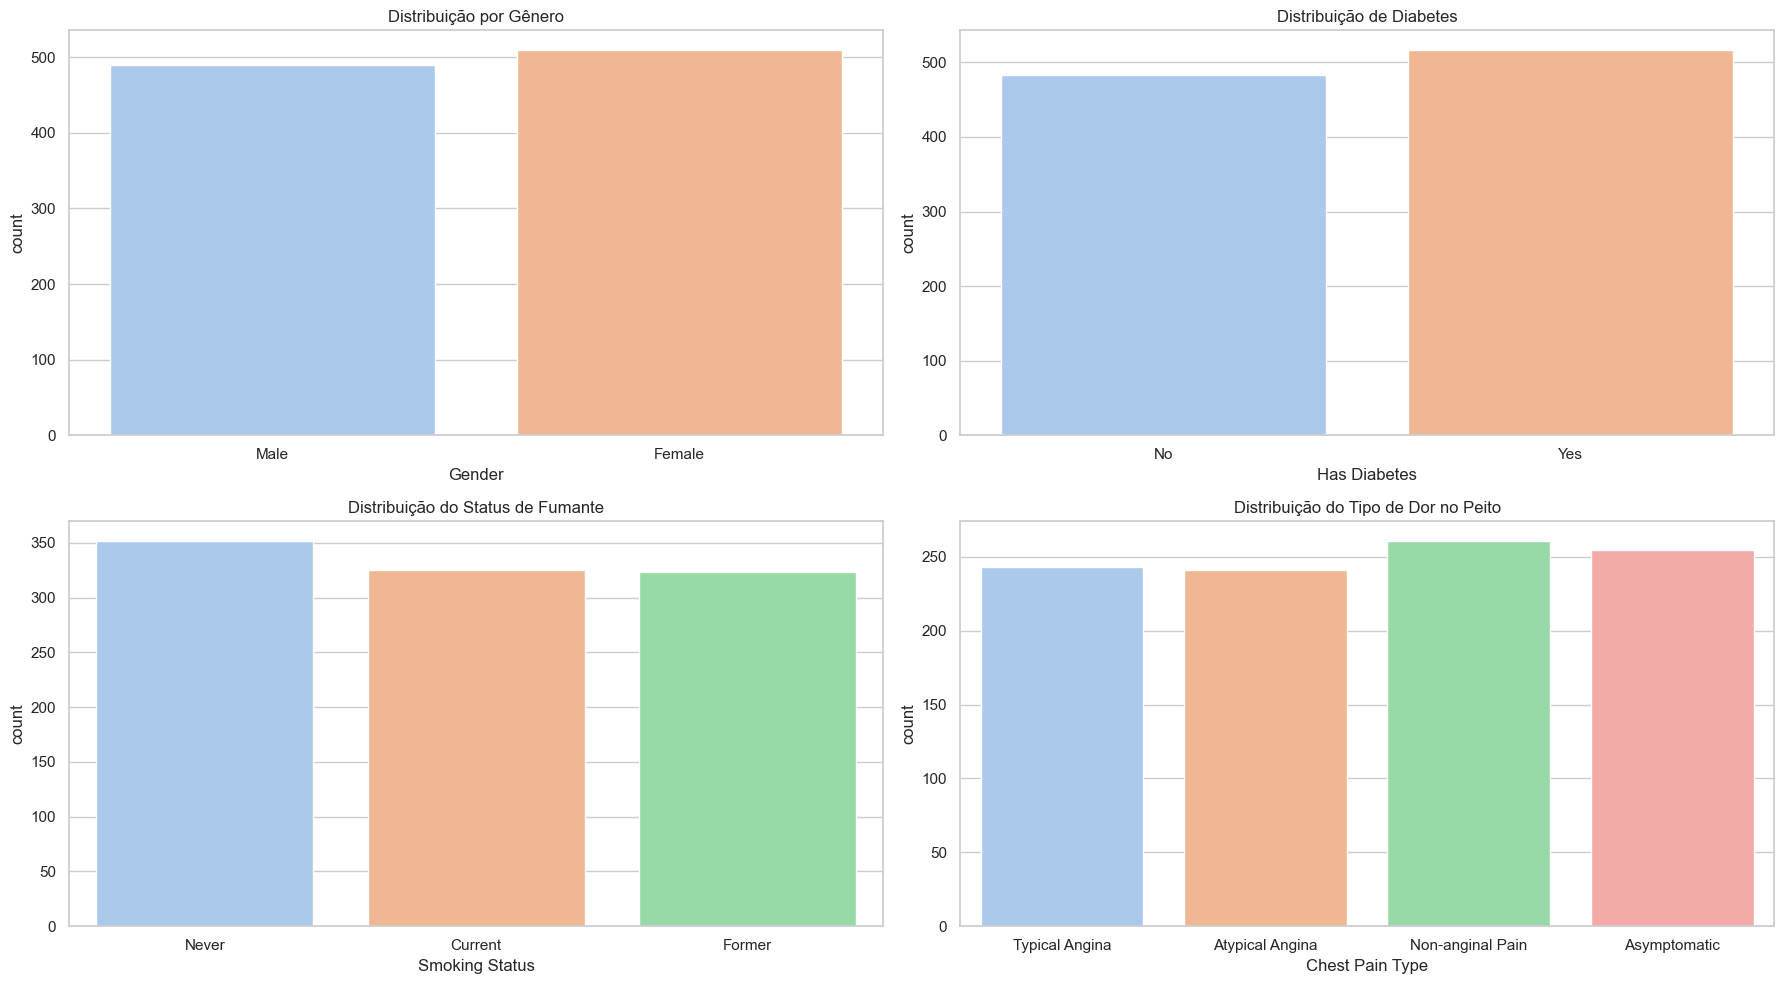

In [73]:
# Plotando a distribuição das variáveis numéricas
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
# Distribuição da Idade
sns.histplot(df['Age'], bins=30, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribuição da Idade')

# Distribuição da Pressão Arterial
sns.histplot(df['Blood Pressure (mmHg)'], bins=30, kde=True, ax=axes[1], color='salmon')
axes[1].set_title('Distribuição da Pressão Arterial')

# Distribuição do Colesterol
sns.histplot(df['Cholesterol (mg/dL)'], bins=30, kde=True, ax=axes[2], color='lightgreen')
axes[2].set_title('Distribuição do Colesterol')

plt.tight_layout()
plt.show()

# Plotando a distribuição das variáveis categóricas
fig, axes = plt.subplots(2, 2, figsize=(18, 10))

# Gênero
sns.countplot(data=df, x='Gender', ax=axes[0, 0], palette='pastel')
axes[0, 0].set_title('Distribuição por Gênero')

# Diabetes
sns.countplot(data=df, x='Has Diabetes', ax=axes[0, 1], palette='pastel')
axes[0, 1].set_title('Distribuição de Diabetes')

# Status de Fumante
sns.countplot(data=df, x='Smoking Status', ax=axes[1, 0], palette='pastel')
axes[1, 0].set_title('Distribuição do Status de Fumante')

# Tipo de Dor no Peito
sns.countplot(data=df, x='Chest Pain Type', ax=axes[1, 1], palette='pastel')
axes[1, 1].set_title('Distribuição do Tipo de Dor no Peito')

plt.tight_layout()
plt.show()

### Distribuição das Variáveis Numéricas:

<b>Idade:</b> A maioria dos pacientes está na faixa dos 50 a 80 anos, com uma distribuição levemente assimétrica para a direita.

<b>Pressão Arterial:</b> A pressão arterial dos pacientes se distribui entre 90 e 199 mmHg, com uma média em torno de 145 mmHg. A distribuição é quase simétrica.

<b>Colesterol:</b> O colesterol varia de 150 a 299 mg/dL, com a maioria dos valores concentrados entre 200 e 250 mg/dL.

### Distribuição das Variáveis Categóricas:

<b>Este é um texto em negrito:</b> O conjunto de dados parece estar balanceado entre homens e mulheres.

<b>Diabetes:</b> A distribuição de pacientes com e sem diabetes está relativamente equilibrada.

<b>Status de Fumante:</b> A maioria dos pacientes nunca fumou, seguido por fumantes atuais e ex-fumantes.

<b>Tipo de Dor no Peito:</b> A "Typical Angina" é o tipo de dor mais comum, seguida pela "Atypical Angina" e "Non-anginal Pain".

‎ 

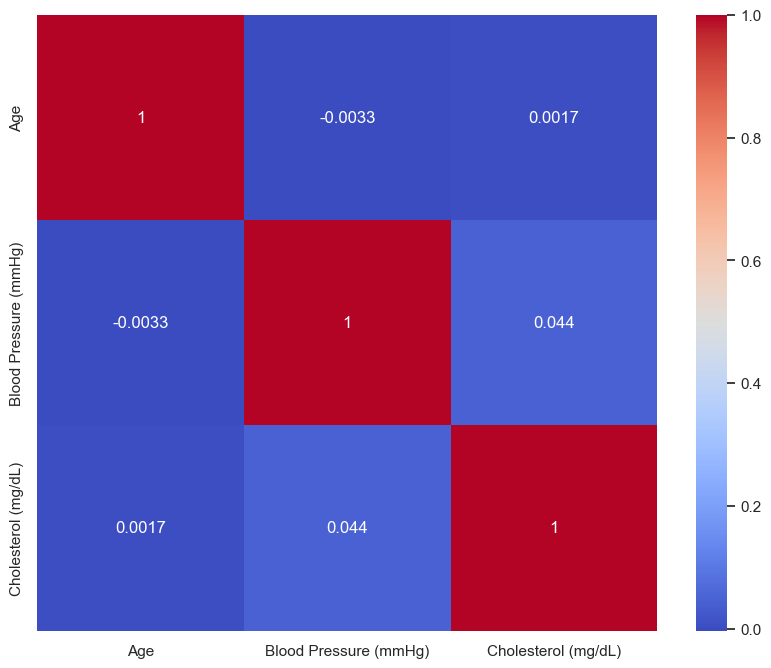

In [74]:
# Correlação!
quant = ['Age','Blood Pressure (mmHg)','Cholesterol (mg/dL)']
correlation_matrix = df[quant].corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

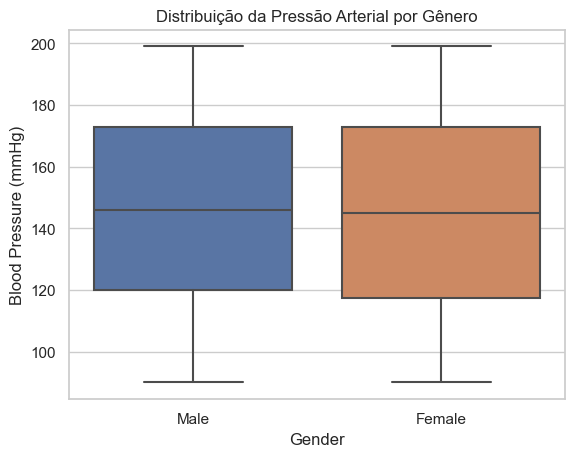

In [75]:
# Distribuição da Pressão Arterial por Gênero
sns.boxplot(x='Gender', y='Blood Pressure (mmHg)', data=df)
plt.title('Distribuição da Pressão Arterial por Gênero')
plt.show()

# Técnias de Pré-processamento

In [76]:
# Encontrar linhas duplicadas
duplicatas = df[df.duplicated()]
# Contar o número total de linhas duplicadas
numero_duplicatas = duplicatas.shape[0]
numero_duplicatas

0

In [77]:
# Verificando valores nulos.
df.isnull().sum()

Gender                   0
Age                      0
Blood Pressure (mmHg)    0
Cholesterol (mg/dL)      0
Has Diabetes             0
Smoking Status           0
Chest Pain Type          0
Treatment                0
dtype: int64

#### Codificação de Variáveis Categóricas:

In [78]:
# Aplicando One Hot Encoding
var_categ = ['Gender', 'Has Diabetes','Smoking Status', 'Chest Pain Type','Treatment']
df_dummies = pd.get_dummies(df[var_categ])
df_dummies

,Gender_Female,Gender_Male,Has Diabetes_No,Has Diabetes_Yes,Smoking Status_Current,Smoking Status_Former,Smoking Status_Never,Chest Pain Type_Asymptomatic,Chest Pain Type_Atypical Angina,Chest Pain Type_Non-anginal Pain,Chest Pain Type_Typical Angina,Treatment_Angioplasty,Treatment_Coronary Artery Bypass Graft (CABG),Treatment_Lifestyle Changes,Treatment_Medication
0,False,True,True,False,False,False,True,False,False,False,True,False,False,True,False
1,True,False,False,True,False,False,True,False,True,False,False,True,False,False,False
2,False,True,False,True,True,False,False,False,False,False,True,True,False,False,False
3,False,True,True,False,False,False,True,False,True,False,False,False,True,False,False
4,False,True,False,True,True,False,False,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,True,False,True,True,False,False,False,False,False,True,True,False,False,False
996,False,True,False,True,False,False,True,False,True,False,False,False,True,False,False
997,True,False,False,True,True,False,False,False,False,True,False,False,True,False,False
998,True,False,True,False,True,False,False,True,False,False,False,False,False,True,False


In [79]:
# Concatenando com o DataFrame princial
df = pd.concat([df,df_dummies], axis='columns')

In [80]:
# Excluindo as variáveis modelos, deixando apenas as dummy
new_df = df.drop(df[var_categ], axis=1)
new_df

,Age,Blood Pressure (mmHg),Cholesterol (mg/dL),Gender_Female,Gender_Male,Has Diabetes_No,Has Diabetes_Yes,Smoking Status_Current,Smoking Status_Former,Smoking Status_Never,Chest Pain Type_Asymptomatic,Chest Pain Type_Atypical Angina,Chest Pain Type_Non-anginal Pain,Chest Pain Type_Typical Angina,Treatment_Angioplasty,Treatment_Coronary Artery Bypass Graft (CABG),Treatment_Lifestyle Changes,Treatment_Medication
0,70,181,262,False,True,True,False,False,False,True,False,False,False,True,False,False,True,False
1,55,103,253,True,False,False,True,False,False,True,False,True,False,False,True,False,False,False
2,42,95,295,False,True,False,True,True,False,False,False,False,False,True,True,False,False,False
3,84,106,270,False,True,True,False,False,False,True,False,True,False,False,False,True,False,False
4,86,187,296,False,True,False,True,True,False,False,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,42,125,193,False,True,False,True,True,False,False,False,False,False,True,True,False,False,False
996,80,186,267,False,True,False,True,False,False,True,False,True,False,False,False,True,False,False
997,64,108,174,True,False,False,True,True,False,False,False,False,True,False,False,True,False,False
998,84,123,195,True,False,True,False,True,False,False,True,False,False,False,False,False,True,False


‎ 

#### Normalização/Escalonamento de Dados:

In [81]:
# Colunas que iremos normalizar/escalar
colunas_para_normalizar = ['Age', 'Blood Pressure (mmHg)','Cholesterol (mg/dL)']

In [82]:
paciente1 = [78,280,0,1,0,1,0,0,1,1,0,0,0,0,0,0,1]
# Normalização (Min-Max Scaling)
scaler_minmax = MinMaxScaler()
df_normalizado = new_df.copy()
df_normalizado[colunas_para_normalizar] = scaler_minmax.fit_transform(new_df[colunas_para_normalizar])


In [83]:
print("Dados Normalizados:")
print(df_normalizado.head())

Dados Normalizados:
        Age  Blood Pressure (mmHg)  Cholesterol (mg/dL)  Gender_Female  \
0  0.677966               0.834862             0.751678          False   
1  0.423729               0.119266             0.691275           True   
2  0.203390               0.045872             0.973154          False   
3  0.915254               0.146789             0.805369          False   
4  0.949153               0.889908             0.979866          False   

   Gender_Male  Has Diabetes_No  Has Diabetes_Yes  Smoking Status_Current  \
0         True             True             False                   False   
1        False            False              True                   False   
2         True            False              True                    True   
3         True             True             False                   False   
4         True            False              True                    True   

   Smoking Status_Former  Smoking Status_Never  Chest Pain Type_Asymptom

In [84]:
df_normalizado

,Age,Blood Pressure (mmHg),Cholesterol (mg/dL),Gender_Female,Gender_Male,Has Diabetes_No,Has Diabetes_Yes,Smoking Status_Current,Smoking Status_Former,Smoking Status_Never,Chest Pain Type_Asymptomatic,Chest Pain Type_Atypical Angina,Chest Pain Type_Non-anginal Pain,Chest Pain Type_Typical Angina,Treatment_Angioplasty,Treatment_Coronary Artery Bypass Graft (CABG),Treatment_Lifestyle Changes,Treatment_Medication
0,0.677966,0.834862,0.751678,False,True,True,False,False,False,True,False,False,False,True,False,False,True,False
1,0.423729,0.119266,0.691275,True,False,False,True,False,False,True,False,True,False,False,True,False,False,False
2,0.203390,0.045872,0.973154,False,True,False,True,True,False,False,False,False,False,True,True,False,False,False
3,0.915254,0.146789,0.805369,False,True,True,False,False,False,True,False,True,False,False,False,True,False,False
4,0.949153,0.889908,0.979866,False,True,False,True,True,False,False,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.203390,0.321101,0.288591,False,True,False,True,True,False,False,False,False,False,True,True,False,False,False
996,0.847458,0.880734,0.785235,False,True,False,True,False,False,True,False,True,False,False,False,True,False,False
997,0.576271,0.165138,0.161074,True,False,False,True,True,False,False,False,False,True,False,False,True,False,False
998,0.915254,0.302752,0.302013,True,False,True,False,True,False,False,True,False,False,False,False,False,True,False


‎ 

#### Divisão dos Dados / K-Fold Cross-Validation:

In [85]:
# Definindo as variáveis independentes (X) e dependente (y)
X = df_normalizado.drop(columns=['Blood Pressure (mmHg)'])  # Exclui a coluna de alvo/label
y = df_normalizado['Blood Pressure (mmHg)']  # Coluna de alvo/label

In [86]:
# Configurando o K-Fold Cross-Validation
k = 5  # Número de folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)

In [87]:
# Escolhendo o modelo de regressão linear
modelo = LinearRegression()

In [88]:
# Executando o K-Fold Cross-Validation
scores = cross_val_score(modelo, X, y, cv=kf, scoring='neg_mean_squared_error')
# Convertendo os scores para valores positivos (MSE)
mse_scores = -scores

In [89]:
print(f"Mean Squared Error para {k} folds: {mse_scores}")
print(f"Média do Mean Squared Error: {mse_scores.mean()}")

Mean Squared Error para 5 folds: [0.08523078 0.08711617 0.08949056 0.09148166 0.07841318]
Média do Mean Squared Error: 0.08634647217041945


> Essa média do MSE é uma boa indicação da performance geral do modelo.

‎ 

#### Aplicando Regressão Linear

In [90]:
# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [91]:
# Instanciar o modelo de regressão linear
model = LinearRegression()

In [92]:
# Treinar o modelo
model.fit(X_train, y_train)

LinearRegression()

Usaremos 1 paciente1 para fazer a previsão de pressão arterial.

In [93]:
# Fazer previsões no conjunto de teste
paciente1_normalizado = np.array([1.02, 0.35, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1])
# Reshape para garantir que é um array 2D com uma única amostra (1 linha)
paciente1_normalizado = paciente1_normalizado.reshape(1, -1)
y_pred = model.predict(paciente1_normalizado)
y_pred

array([0.48424836])

In [94]:
ptmax = 199
ptmin = 90
# Desnormalizando a predição
bp_pred = 0.48424836 * (ptmax - ptmin) + ptmin
print(bp_pred)

142.78307124


Modelo previu que o paciente1 colocado para previsão estará com 142.78 de 'Blood Pressure (mmHg)'.

‎ 

Previsão realizada para um paciente1 específico, onde, após normalizar as variáveis de entrada, foi obtido um valor de pressão arterial normalizado de 0.48424836. Este valor, inicialmente na escala normalizada, foi convertido de volta para a escala original para fornecer uma estimativa precisa da pressão arterial em mmHg.

A análise desses resultados é crucial para validar a eficácia do modelo e sua aplicabilidade em contextos clínicos reais, onde a precisão na predição pode significar uma intervenção médica oportuna e eficaz.

### Fim!